In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# as we see age and Embarked column has null value which is not good for train data 

# Fill null values

In [14]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10580\1863993965.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


# Drop irrelevant columsn = name , cabin and Ticket 

In [16]:
df.drop(columns=['Name','Ticket','Cabin'],inplace=True)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Convert categorical data into numerical data using label encoding 

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [23]:
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [24]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [54]:
df['family_members']=df['SibSp']+df['Parch']
df.drop(columns=['SibSp','Parch'],inplace=True)

In [55]:
df.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,family_members
663,664,0,3,1,36.0,7.4958,2,0
87,88,0,3,1,28.0,8.0500,2,0
889,890,1,1,1,26.0,30.0000,0,0


# split feature and target

In [56]:
df.shape

(891, 8)

In [57]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
X_train.shape , X_test.shape

((712, 7), (179, 7))

# train the model

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()

In [63]:
lr.fit(X_train,y_train)

LinearRegression()

In [64]:
# lr.coef_

In [65]:
# lr.intercept_

# Predict and accuracy_score by using r2_score 

In [66]:
from sklearn.metrics import r2_score

In [67]:
y_pred = lr.predict(X_test)

In [109]:
lr.predict(X_test)

array([ 0.13249084,  0.2450355 ,  0.16429878,  0.87256056,  0.71122481,
        0.95709751,  0.65351832,  0.09575073,  0.70470013,  0.89891683,
        0.33722768,  0.04429063,  0.50597431,  0.15871849,  0.21742496,
        0.9881623 ,  0.33973994,  0.67258516,  0.28876402,  0.32037189,
        0.11612658,  0.3901441 ,  0.6212519 ,  0.1562487 ,  0.11296547,
        0.05826593,  0.41361038,  0.25856189,  0.04556484,  0.60789595,
        0.17096233,  0.63621312,  0.51198278,  0.61313847,  0.13940036,
        0.163868  ,  0.39859281,  0.64801721,  1.02441224,  0.12141196,
        0.23388303,  0.07050948,  0.12675323,  0.1609114 ,  0.58477182,
        0.02479422,  0.12737225,  0.12430724,  0.11128967,  0.33075964,
        0.71472585,  0.80577671, -0.10684803,  0.4554165 , -0.03970354,
        0.94715572,  0.22045581,  0.94825431,  0.73686425,  0.68186616,
        0.13626699,  0.82013911,  0.75123712,  0.40294221,  0.12887557,
        0.6603843 ,  0.29486517,  0.09962922,  0.17150388,  0.89

In [68]:
print("accuracy_score : ",r2_score(y_test,y_pred))

accuracy_score :  0.4359809846508349


# Some addition work for visualization

In [69]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,family_members
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,0.012658,0.013128,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,0.257307,-0.167675,0.016639
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,-0.549500,0.162098,0.065997
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.182333,0.108262,-0.200988
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,0.096688,-0.018754,-0.245619
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,1.000000,-0.224719,0.217138
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.018754,-0.224719,1.000000,0.066516
family_members,-0.040143,0.016639,0.065997,-0.200988,-0.245619,0.217138,0.066516,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10580\4243127046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette=['#ff6b6b', '#51cf66'],legend=False)


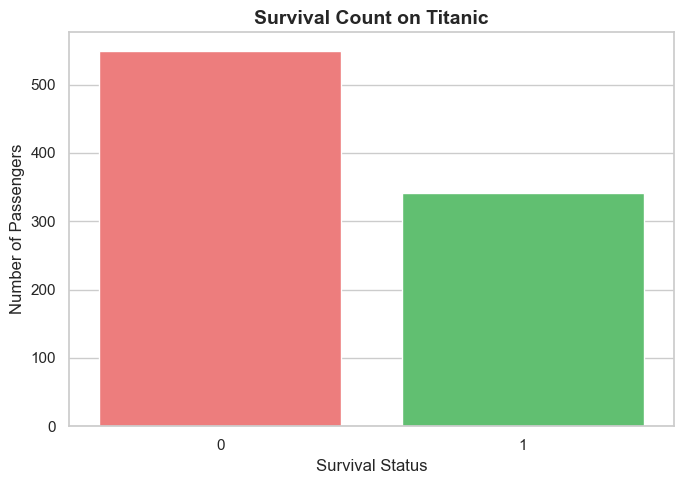

In [81]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.countplot(x='Survived', data=df, palette=['#ff6b6b', '#51cf66'],legend=False) 

plt.title("Survival Count on Titanic", fontsize=14, fontweight='bold')
plt.xlabel("Survival Status", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)

plt.tight_layout()
plt.show()


# Survival according to sex

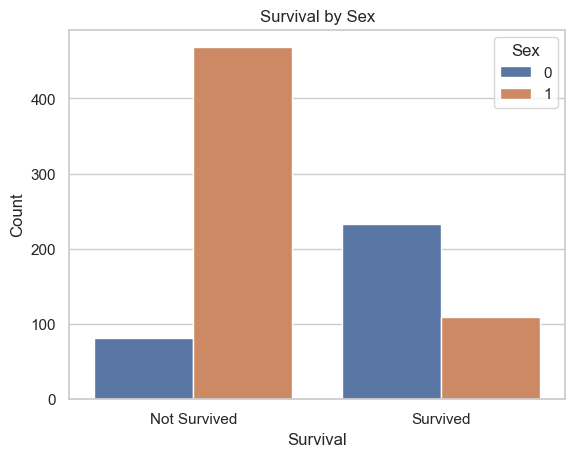

In [85]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Sex")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel("Survival")
plt.ylabel("Count")
plt.show()

# Age distribution with kde plot 

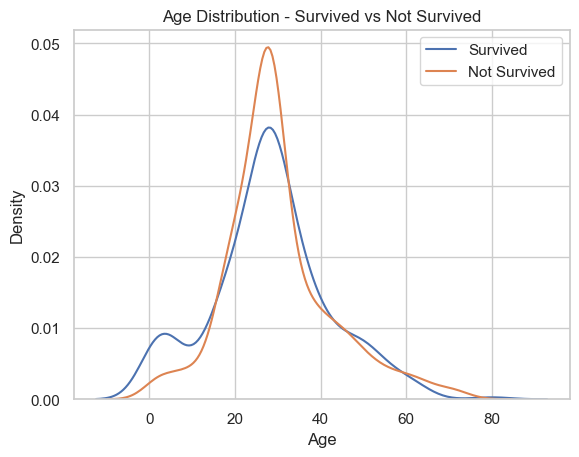

In [88]:
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived')
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Not Survived')
plt.title("Age Distribution - Survived vs Not Survived")
plt.xlabel("Age")
plt.legend()
plt.show()

# Fare distribution

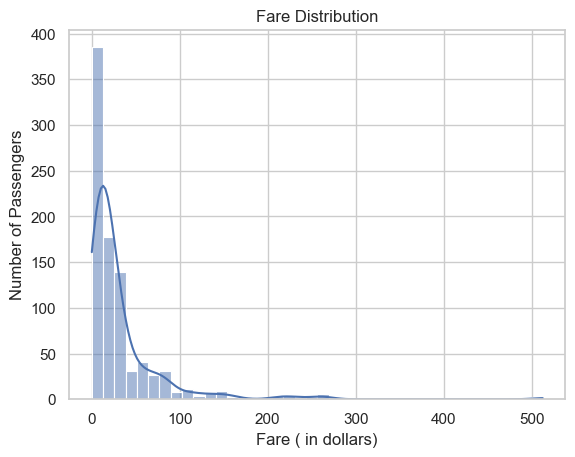

In [90]:
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare ( in dollars)")
plt.ylabel("Number of Passengers")
plt.show()

# Heatmap 

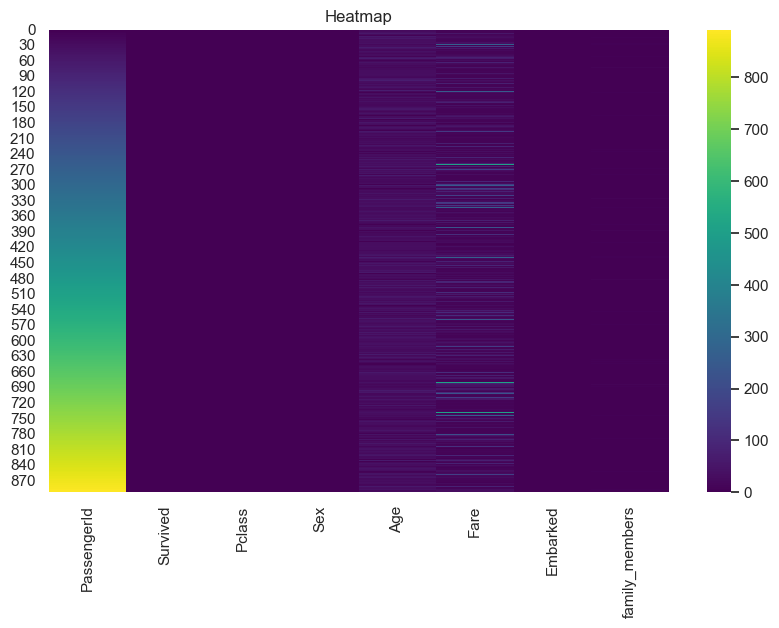

In [92]:
plt.figure(figsize=(10, 6))
sns.heatmap(df, cmap='viridis')
plt.title("Heatmap")
plt.show()


In [93]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,family_members
0,1,0,3,1,22.0,7.2500,2,1
1,2,1,1,0,38.0,71.2833,0,1
2,3,1,3,0,26.0,7.9250,2,0
3,4,1,1,0,35.0,53.1000,2,1
4,5,0,3,1,35.0,8.0500,2,0
